In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
#read data
df = pd.read_csv('Concrete_Data.csv') 

In [2]:
X = df[['Cement (component 1)(kg in a m^3 mixture)']].values
y = df[['Concrete compressive strength(MPa, megapascals) ']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
m=0
b=0
h=lambda x : m*x + b
learn=0.00001
N=len(X_train)

Weight: 0.07992580135699545
Bias: 13.06303241095009
r2_score: 0.24211792543204347


Text(0,0.5,'Concrete compressive strength(MPa, megapascals) ')

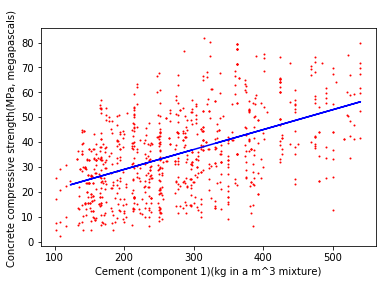

In [3]:
for i in range (1000):
    sum_b, sum_m = 0, 0
    for j in range (N):
        sum_b += h(X_train[j])-y_train[j]
        sum_m += (h(X_train[j])-y_train[j]) * X_train[j]
    sum_b, sum_m = sum_b/N, sum_m/N
    b = b - (0.1 * sum_b)
    m = m - (learn * sum_m)

y_pred = h(X_test)
print("Weight: {}".format(m[0]))
print("Bias: {}".format(b[0]))
print("r2_score: {}".format(r2_score(y_test, y_pred)))

plt.scatter(X_train, y_train, c='r', s=1)
plt.plot(X_test,y_pred,c='b')
plt.xlabel(df.columns.values[0])
plt.ylabel(df.columns.values[8])